In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [68]:
def read_img_and_convert_to_gray(img_path):
    img=plt.imread(img_path)
    out= np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
    out=out.astype(int)
    return out

# histogram 绘制


In [59]:
def plt_hist(img):
    plt.hist(img.flatten(),bins=np.arange(0,257))

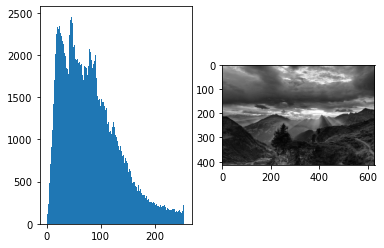

In [69]:
img=read_img_and_convert_to_gray('./pic/montain.jpg')
plt.subplot(1,2,1)
plt_hist(img)
plt.subplot(1,2,2)
plt.imshow(img,cmap="gray")

# thresholding

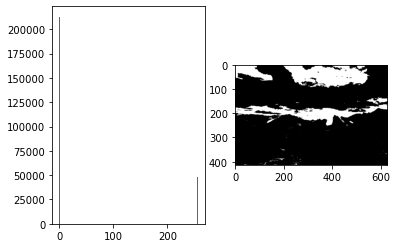

In [25]:
def thresholding(img,k):
    out=np.zeros_like(img)
    filt=img<k
    out[filt]=0
    out[~filt]=255
    return out
out=thresholding(img,128)
plt.subplot(1,2,1)
plt_hist(out)
plt.subplot(1,2,2)
plt.imshow(out,cmap="gray")

# digital negative

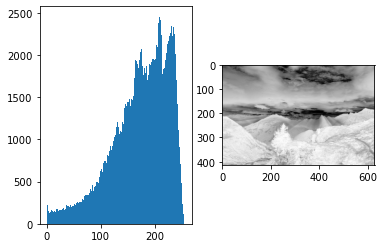

In [29]:
def digital_negative(img):
    out=255-img
    return out 
out=digital_negative(img)
plt.subplot(1,2,1)
plt_hist(out)
plt.subplot(1,2,2)
plt.imshow(out,cmap="gray")

# ps level operation
## 2，2，1
* 作用：
将像素值小于该值的像素点设为0
* 引起图像的变化：
将图像的暗部变得更暗
* 引起的曲线变化：
截取剩下的范围，并将其映射到 0-255
## 2，2，2
* 作用：
将像素值大于该值的像素点设为255
* 引起图像的变化：
将图像的亮部变得更亮
* 引起的曲线变化：
截取剩下的范围，并将其映射到 0-255
## 2，2，3
* 作用：
使得图像上的像素点所能达到的最黑的值变为 m
* 引起图像的变化：
图像整体变亮
* 引起的曲线变化：
将整个图像映射到该范围中
## 2，2，3
* 作用：
使得图像上的像素点所能达到的最白的值变为 m
* 引起图像的变化：
图像整体变暗
* 引起的曲线变化：
将整个图像映射到该范围中
## 5 中间滑块
* 作用：
对曲线中部（即中等亮度 不明不暗处）进行调整，
初始状态下，滑块位于中部，若将滑块左移至 k，则将会使得0-k的值映射到0-128，k-255的值映射到128-255。(假设下方的滑块未动)
那么则原本图像中的一些 < 128 的暗部被映射到中部，暗部减少，使得画面更亮。
* 引起图像的变化：
右移图像整体变暗，左移画面整体变亮。
* 引起的曲线变化：
将0-k的值映射至0-128，k-255映射到128-255。

(-0.5, 627.5, 415.5, -0.5)

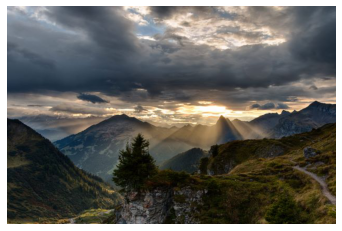

In [8]:
img=plt.imread('./montain.jpg')
plt.imshow(img)
plt.axis('off')

In [11]:
def show_two_pair_img_and_curve(img,changed):
    plt.subplot(2,2,1)
    plt.imshow(img)
    plt.axis("off")
    plt.subplot(2,2,2)
    plt.hist(img.flatten(),bins=256)
    plt.subplot(2,2,3)
    plt.imshow(changed)
    plt.axis("off")
    plt.subplot(2,2,4)
    plt.hist(changed.flatten(),bins=256)
    plt.show()

    

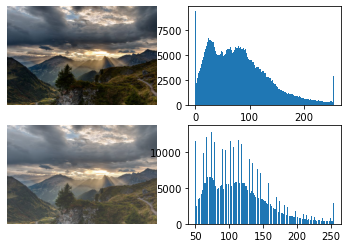

In [12]:
def change_slide1(img,m,n):
    """
    改变ps中下面的一条滑块
    即是将所能达到的最黑设为 m 最白设为 n
    将整个曲线映射到m,n上
    引起的应该是对比度的下降
    """
    out=np.zeros_like(img)
    # 计算出其变换后的值应该为多少 b
    leftest=m
    rightest=n
    length=rightest-leftest
    factor=length/256
    for a in range(0,256):
        # 取出每一个原来值为 a 的像素
        filt=(img==a)
        b=int(m+factor*a)
        out[filt]=b
    return out
changed=change_slide1(img,50,255)
show_two_pair_img_and_curve(img,changed)

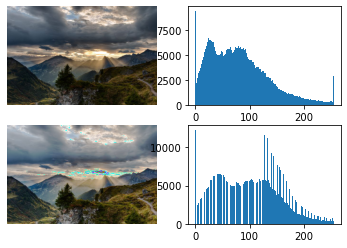

In [20]:
def change_ratio(img,k):
    out = np.zeros_like(img)
    left_factor=128/k
    right_factor=128/(255-k)
    for i in range(0,k):
        filt=img==i
        new_value=int(left_factor*i)
        out[filt]=new_value
    for i in range(k,256):
        filt=img==i
        new_value=int(128+right_factor*(i-k))
        out[filt]=new_value
    return out
changed=change_ratio(img,80)
show_two_pair_img_and_curve(img,changed)

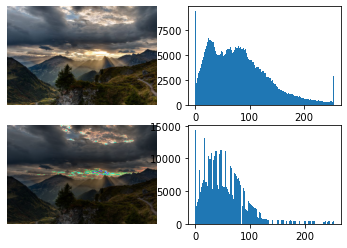

In [21]:
changed=change_ratio(img,200)
show_two_pair_img_and_curve(img,changed)

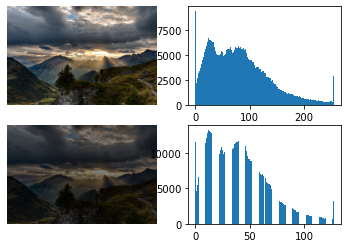

In [15]:
changed=change_ratio(img,0.5)
show_two_pair_img_and_curve(img,changed)

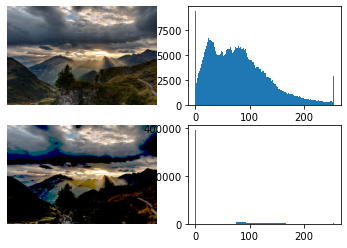

In [16]:
def change_slide2(img,m,n):
    out=img.copy()
    # 将值小于m的设置为纯黑 0   
    # 将值大于n的设置为纯白 255
    filt=img>n
    out[filt]=255
    filt=img<m
    out[filt]=0
    return out
changed=change_slide2(img,75,255)
show_two_pair_img_and_curve(img,changed)

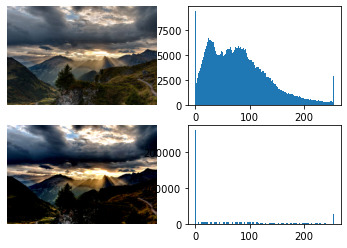

In [18]:
def change_slide2_and_do_affine(img,m,n):
    out=np.zeros_like(img)
    # 将值小于m的设置为纯黑 0   
    # 将值大于n的设置为纯白 255
    # 再将剩下的部分映射到0-255上
    filt=img>=n
    out[filt]=255
    filt=img<m
    out[filt]=0
    
    length=n-m
    factor=255/length
    for i in range(m,n):
        filt=(img==i)
        new_value=int(factor*(i-m))
        out[filt]=new_value
    return out
changed=change_slide2_and_do_affine(img,50,200)
show_two_pair_img_and_curve(img,changed)

# histogram equalization

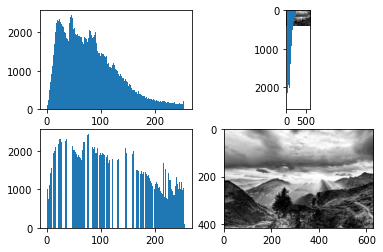

In [81]:
def histogram_equalization(img):
    # 求出每个值的频次
    num=plt.hist(img.flatten(),bins=np.arange(0,257))
    #求出每个值的概率
    pro=num[0]/num[0].sum()
    # 求出累计分布
    out=np.zeros_like(pro)
    for i in range(1,257):
        out[i-1]=int(pro[0:i].sum()*255)

    # 进行映射
    out_img=np.zeros_like(img)
    for i in range(0,256):
        filt=img==i
        out_img[filt]=out[i]
    return out_img
out=histogram_equalization(img)
plt.subplot(2,2,1)
plt_hist(img)
plt.subplot(2,2,2)
plt.imshow(img,cmap="gray")
out=histogram_equalization(img)
plt.subplot(2,2,3)
plt_hist(out)
plt.subplot(2,2,4)
plt.imshow(out,cmap="gray")